237.4612319830224
46.98285938758684
1.752705444856271e-14
1.752705444856271e-14
6.985062435387308e-15
6.985062435387308e-15
4.383951072968387e-15
4.383951072968387e-15
3.3194274268165203e-15
3.238580176538728e-15
3.2026650926608615e-15
3.2026650926608615e-15
0.0
Explained Variance
Eigenvector 0: 0.8348256799387275
Eigenvector 1: 0.16517432006127244
Eigenvector 2: 6.161862728140228e-17
Eigenvector 3: 6.161862728140228e-17
Eigenvector 4: 2.4556890606267848e-17
Eigenvector 5: 2.4556890606267848e-17
Eigenvector 6: 1.541234712186877e-17
Eigenvector 7: 1.541234712186877e-17
Eigenvector 8: 1.1669876532930177e-17
Eigenvector 9: 1.1385647565865944e-17
Eigenvector 10: 1.1259383442379296e-17
Eigenvector 11: 1.1259383442379296e-17
Eigenvector 12: 0.0


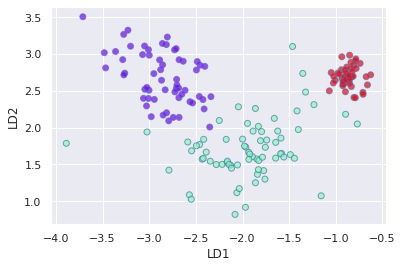

In [14]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

X.head()

df = X.join(pd.Series(y, name='class'))
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).T)
    
within_class_scatter_matrix += s
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
X_lda = np.array(X.dot(w_matrix))
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.7,edgecolors='b')

